In [2]:
!pip install requests_html
!pip install bs4

  Using cached requests_html-0.10.0-py3-none-any.whl (13 kB)
  Using cached fake-useragent-0.1.11.tar.gz (13 kB)
  Using cached parse-1.19.0.tar.gz (30 kB)
  Using cached w3lib-1.22.0-py2.py3-none-any.whl (20 kB)
  Using cached pyquery-1.4.3-py3-none-any.whl (22 kB)
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=4368abfb5403262c44472f33fc4c66ecb647ba6244aedd573cbbe9c39938c067
  Stored in directory: c:\users\lammi\appdata\local\pip\cache\wheels\12\8a\a1\0ab79c1c2c58aa7647d0dea17f2af2358b65e1eecac8094b5e
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=912378ab6bb16c076749d718c250221cb65ca5b65b975b20a4fa1fd1da9da6c5
  Stored in directory: c:\users\lammi\appdata\local\pip\cache\wheels\f3\51\0f\3f8d940cdb647f9c84197352c2c66b9b910911e112f0bfd340
Successfully built fake-useragent parse


In [5]:
import requests_html
from bs4 import BeautifulSoup
f = open('all_link_laptop_raw.html','r',encoding='utf-8')
f = f.read()

In [6]:
soup = BeautifulSoup(f)

In [ ]:
print(soup)

In [ ]:
link_list = []
# Xét từng dòng trong soup, tìm thẻ a có class:"main-contain"
for item in soup.find_all('a',{"class":"main-contain"}):
    # Tìm thuộc tính href và lấy giá trị của nó
    print(item['href'])
    # Đưa vào danh sách link list
    link_list.append('https://www.thegioididong.com'+str(item['href']))
    print('----------------')

In [9]:
print(link_list[3])

https://www.thegioididong.com/laptop/acer-nitro-5-gaming-an515-57-5831-i5-nhqdgsv003?src=osp


In [10]:
# Themem thư việc load json, và thư viện pretty print để in dict tạo từ json có cấu trúc dễ nhìn
import json
import pprint

In [ ]:
pprint.pprint(link_list)

In [61]:
# Tạo session HTML có header 
req = requests_html.HTMLSession()
# Test thử link thứ 3
res = req.get(link_list[3])
# Chuyển từ byte sang soup
soup_laptop = BeautifulSoup(res.content)
# Từ soup tìm kiếm thẻ script có chứa thuộc tính id="productId"
data_tag = soup_laptop.find('script',{"id":"productld"})
# Lấy nội dung thẻ script vừa tìm được
data_specs = data_tag.text
# Chuyển nôi dung json trong thẻ sang dict
data_specs_json = json.loads(data_specs)
pprint.pprint(data_specs_json)
# In ra số nhân cpu
# pprint.pprint(data_specs_json)
# pprint.pprint(data_specs_json['additionalProperty'][3])
# pprint.pprint(data_specs_json['additionalProperty'][1]['value'])
# # In ra tên cpu
# cpu_raw_info = data_specs_json['additionalProperty'][0]['value']
# # In ra bộ nhớ ram
# pprint.pprint(data_specs_json['additionalProperty'][6]['value'])
# # In ra bộ nhớ trong
# pprint.pprint(data_specs_json['additionalProperty'][10]['value'])
# # In ra kích thước màn hình
# pprint.pprint(data_specs_json['additionalProperty'][11]['value'])
# # In ra độ phân giải màn hình
# pprint.pprint(data_specs_json['additionalProperty'][12]['value'])
# start_cpu_name = cpu_raw_info.index("target='_blank'")+ 16
# end_cpu_name = cpu_raw_info.index("</a>")
# start_cpu_code = cpu_raw_info.index("</a> - <a href='")
# print(cpu_raw_info[start_cpu_name:end_cpu_name])


# pprint.pprint(cpu_raw_info[0])


{'@context': 'https://schema.org',
 '@type': 'Product',
 'additionalProperty': [{'@type': 'PropertyValue',
                         'name': 'Công nghệ CPU',
                         'value': '<a '
                                  "href='https://www.thegioididong.com/hoi-dap/tim-hieu-ve-bo-xu-ly-intel-core-the-he-thu-11-1304404' "
                                  "target='_blank'>Intel Core i5 Tiger "
                                  'Lake</a> - <a '
                                  "href='https://www.thegioididong.com/hoi-dap/danh-gia-hieu-nang-on-dinh-tren-intel-core-i5-11400h-1389833' "
                                  "target='_blank'>11400H</a>"},
                        {'@type': 'PropertyValue',
                         'name': 'Số nhân',
                         'value': '6'},
                        {'@type': 'PropertyValue',
                         'name': 'Số luồng',
                         'value': '12'},
                        {'@type': 'PropertyValue',
            

In [62]:
# Danh sách chứa số nhân cpu
cpu_core_array = []
cpu_name_array = []
ram_array = []
storage_array = []
screen_size_array = []
display_resolution_array = []
# Tương tụ như trên nhưng trong vòng lặp
req = requests_html.HTMLSession()
for link in link_list:
    res = req.get(link)
    soup_laptop = BeautifulSoup(res.content)
    data_tag = soup_laptop.find('script',{"id":"productld"})
    data_specs = data_tag.text
    data_specs_json = json.loads(data_specs)
    pprint.pprint(data_specs_json['additionalProperty'][1]['value'])
    # Lưu lại số nhân cpu vào mảng để đếm
    cpu_core_array.append(data_specs_json['additionalProperty'][1]['value'])
    # Lưu lại số ram vào mảng để đếm
    ram_array.append(data_specs_json['additionalProperty'][6]['value'])
    # Lưu lại bộ nhớ trong vào mảng để đếm
    storage_array.append(data_specs_json['additionalProperty'][10]['value'])
    # Lưu lại kích thước màn hình vào mảng để đếm
    screen_size_array.append(data_specs_json['additionalProperty'][11]['value'])
    # Lưu lại độ phân giải màn hình vào mảng để đếm
    display_resolution_array.append(data_specs_json['additionalProperty'][12]['value'])
    # Lưu lại tên cpu vào mảng để thống kê
    cpu_raw_info = data_specs_json['additionalProperty'][0]['value']
    start_cpu_name = cpu_raw_info.index("target='_blank'")+ 16
    end_cpu_name = cpu_raw_info.index("</a>")
    start_cpu_code = cpu_raw_info.index("</a>")
    cpu_name_array.append(cpu_raw_info[start_cpu_name:end_cpu_name])
    # Nếu cpu có số nhân lớn hơn 8, in ra tên cpu đó
    if int(data_specs_json['additionalProperty'][1]['value'])>8:
        pprint.pprint(data_specs_json['additionalProperty'][0]['value'])


'4'
'8'
'8'
'6'
'4'
'8'
'6'
'4'
'4'
'6'
'8'
'6'
'8'
'4'
'4'
'2'
'2'
'6'
'6'
'8'
'4'
'8'
'14'
('<a '
 "href='https://www.thegioididong.com/hoi-dap/intel-the-he-12-alder-lake-tren-laptop-cau-hinh-va-thoi-1396454' "
 "target='_blank'>Intel Core i7 Alder Lake</a> - 12700H")
'10'
("<a href='https://www.thegioididong.com/tin-tuc/apple-m1-max-la-gi-1391498' "
 "target='_blank'>Apple M1 Max</a>")
'8'
'8'
'10'
("<a href='https://www.thegioididong.com/tin-tuc/apple-m1-pro-la-gi-1391496' "
 "target='_blank'>Apple M1 Pro</a>")
'8'
'8'
'14'
('<a '
 "href='https://www.thegioididong.com/hoi-dap/intel-the-he-12-alder-lake-tren-laptop-cau-hinh-va-thoi-1396454' "
 "target='_blank'>Intel Core i7 Alder Lake</a> - 12700H")
'8'
'14'
('<a '
 "href='https://www.thegioididong.com/hoi-dap/intel-the-he-12-alder-lake-tren-laptop-cau-hinh-va-thoi-1396454' "
 "target='_blank'>Intel Core i7 Alder Lake</a> - 12700H")
'8'
'8'
'8'
'4'
'4'
'4'
'4'
'4'
'4'
'4'
'4'
'8'
'4'
'4'
'4'
'4'
'4'
'14'
('<a '
 "href='https://www.t

In [97]:
# Đếm số lần xuất hiện của từng số nhân cpu trong mảng trên
# Thư viện Counter
from collections import Counter
pprint.pprint(Counter(cpu_core_array))


Counter({'4': 62, '8': 41, '6': 27, '14': 5, '2': 2, '10': 2, '12': 1})


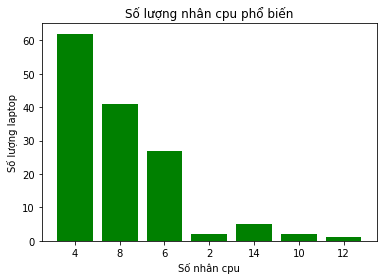

In [105]:
# Vẽ đồ thị cho số nhân cpu laptop phổ biến
import matplotlib.pyplot as plt
cpu_core_data = Counter(cpu_core_array)
plt.title('Số lượng nhân cpu phổ biến')
plt.bar(cpu_core_data.keys(),cpu_core_data.values(),color='green')
plt.ylabel('Số lượng laptop')
plt.xlabel('Số nhân cpu')
plt.show()


In [98]:
# Đếm số lần xuất hiện của từng bộ nhớ ramtrong mảng trên
pprint.pprint(Counter(ram_array))

Counter({'8 GB': 77, '16 GB': 55, '32 GB': 6, '4 GB': 2})


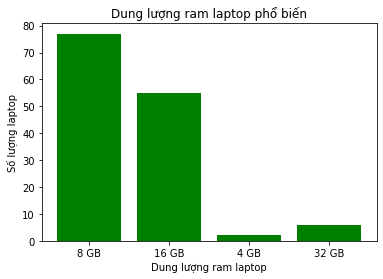

In [106]:
# Vẽ đồ thị cho dung lượng ram laptop phổ biến
import matplotlib.pyplot as plt
ram_data = Counter(ram_array)
plt.title('Dung lượng ram laptop phổ biến')
plt.bar(ram_data.keys(),ram_data.values(),color='green')
plt.ylabel('Số lượng laptop')
plt.xlabel('Dung lượng ram laptop')
plt.show()

In [99]:
# Đếm số lần xuất hiện của từng bộ nhớ ramtrong mảng trên
pprint.pprint(Counter(storage_array))

Counter({'512 GB SSD NVMe PCIe (Có thể tháo ra, lắp thanh khác tối đa 1TB)': 36,
         '512 GB SSD NVMe PCIe': 31,
         '512 GB SSD NVMe PCIe (Có thể tháo ra, lắp thanh khác tối đa 2TB)': 18,
         '512 GB SSD NVMe PCIe (Có thể tháo ra, lắp thanh khác tối đa 1TB (2280) / 512GB (2242))': 12,
         '256 GB SSD NVMe PCIe': 7,
         '1 TB SSD M.2 PCIe (Có thể tháo ra, lắp thanh khác tối đa 2TB)': 5,
         '1 TB SSD M.2 PCIe': 5,
         '256 GB SSD': 4,
         '2 TB SSD NVMe PCIe': 4,
         '512 GB SSD NVMe PCIe (Có thể tháo ra, lắp thanh khác tối đa 2TB (2280) / 1TB (2230))': 4,
         '512 GB SSD': 3,
         'Hỗ trợ thêm 1 khe cắm SSD M.2 PCIe mở rộng (nâng cấp tối đa 1TB)': 3,
         '256 GB SSD NVMe PCIe (Có thể tháo ra, lắp thanh khác tối đa 2TB (2280) / 512GB (2230))': 1,
         '256 GB SSD M.2 SATA 3 (Có thể tháo ra lắp thanh khác tối đa 1TB)': 1,
         '1TB SSD NVMe PCIe (Có thể tháo ra, lắp thanh khác tối đa 2TB M.2 2280 PCIe Gen4 x4 NVMe / 1TB 

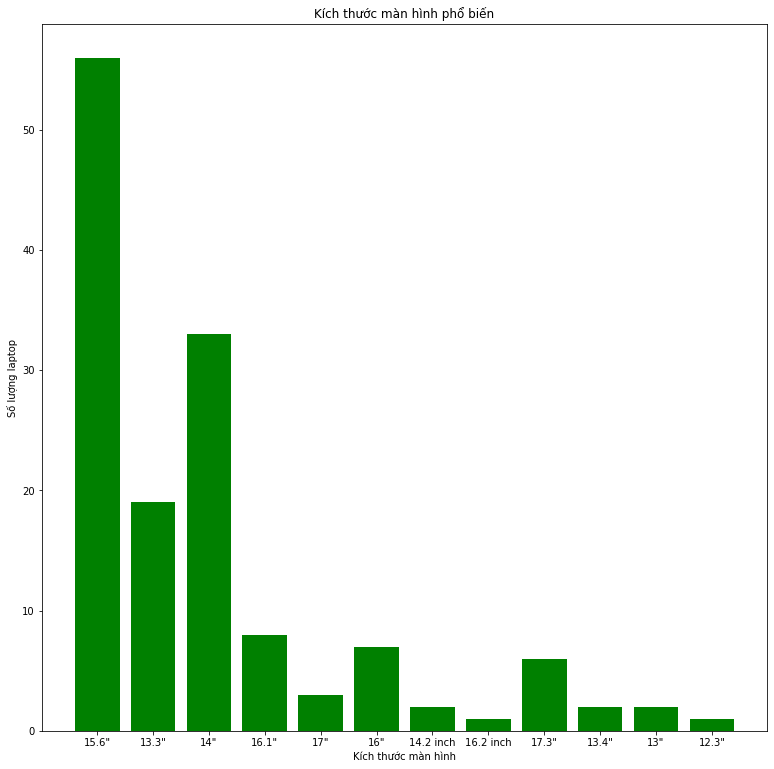

In [113]:
# Vẽ đồ thị cho kích thước màn hình  laptop phổ biến
import matplotlib.pyplot as plt
screen_size_data = Counter(screen_size_array)
plt.figure(figsize=(13,13))
plt.title('Kích thước màn hình phổ biến')
plt.bar(screen_size_data.keys(),screen_size_data.values(),color='green')
plt.ylabel('Số lượng laptop')
plt.xlabel('Kích thước màn hình')
plt.show()



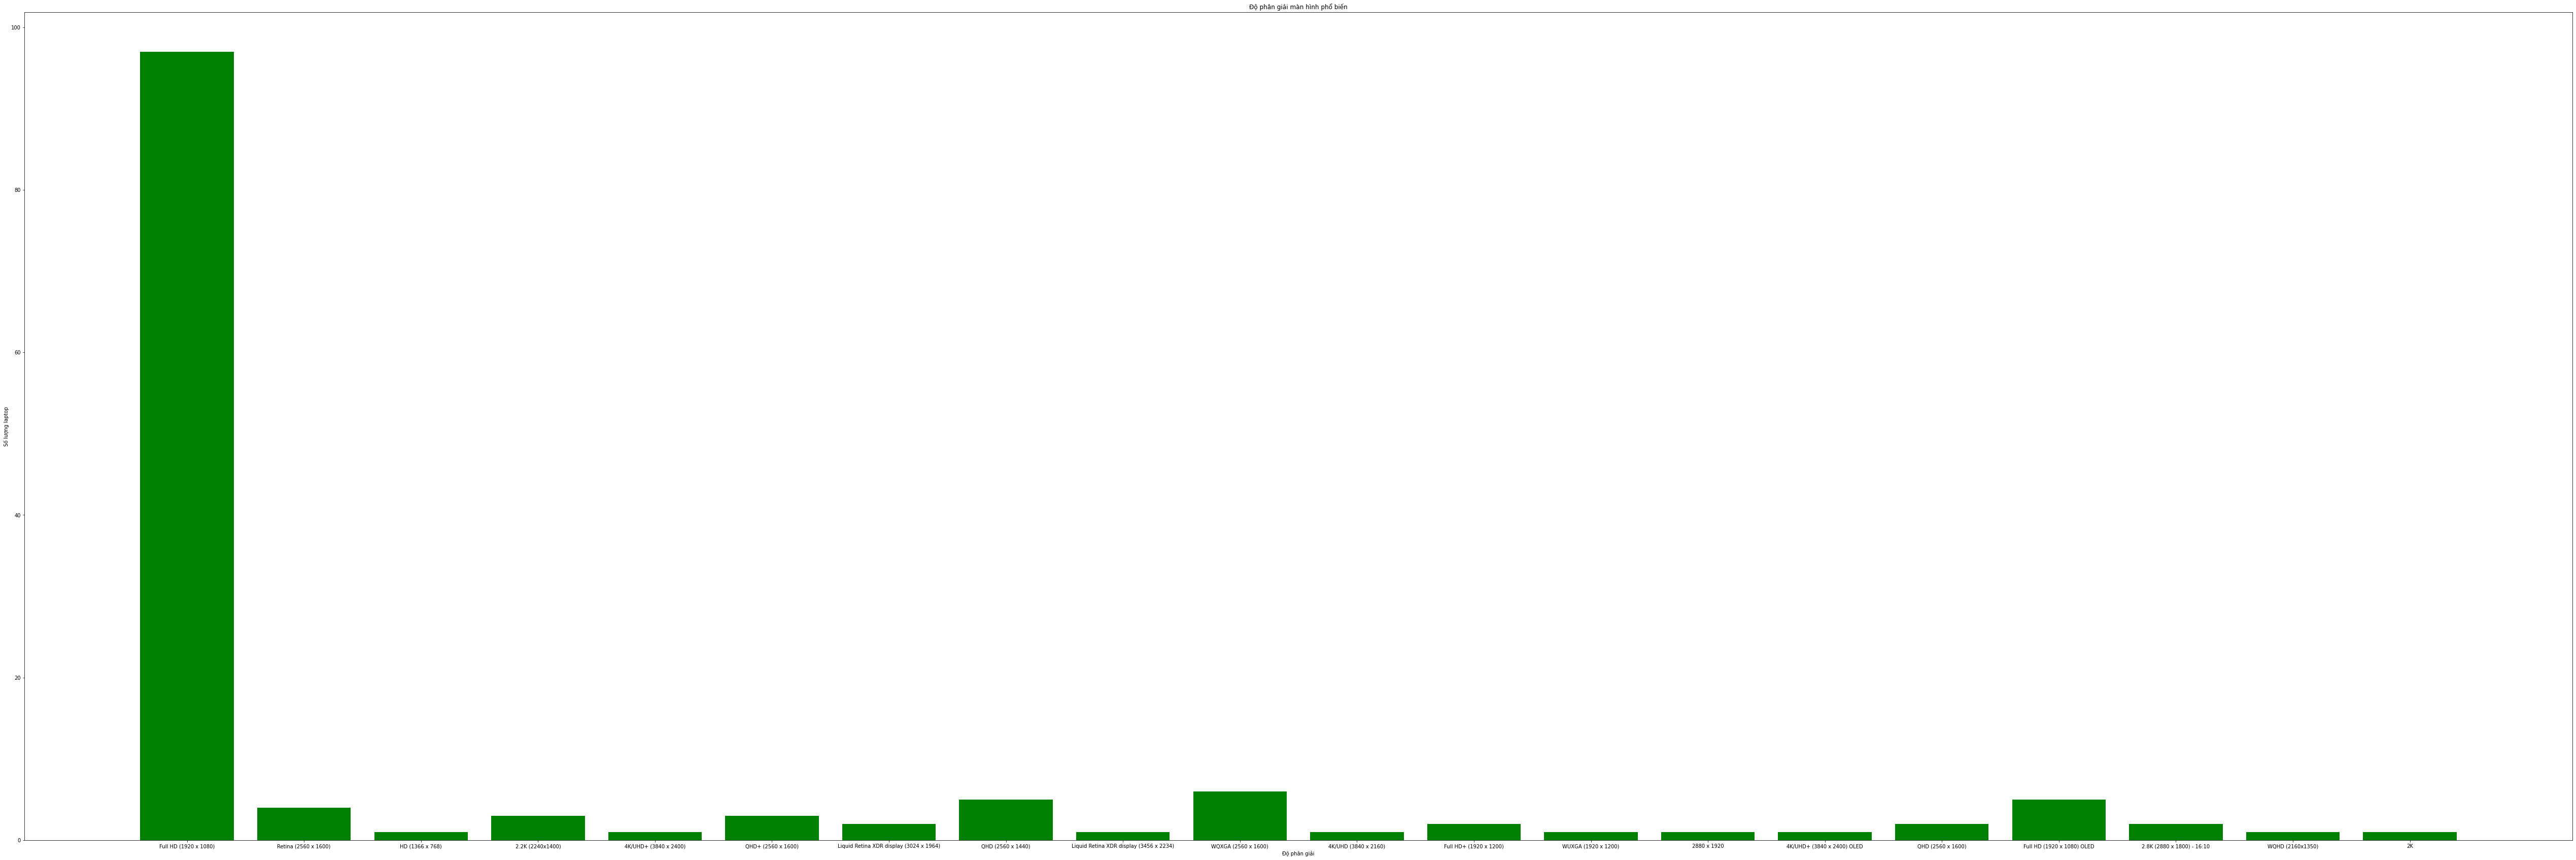

In [118]:
# Vẽ đồ thị cho độ phân giải màn hình laptop phổ biến
import matplotlib.pyplot as plt
display_resolution_data = Counter(display_resolution_array)
plt.figure(figsize=(90,30))
plt.title('Độ phân giải màn hình phổ biến')
plt.bar(display_resolution_data.keys(),display_resolution_data.values(),color='green')
plt.ylabel('Số lượng laptop')
plt.xlabel('Độ phân giải')
plt.show()

In [30]:
string_manupation = '''('<a '
 "href='https://www.thegioididong.com/hoi-dap/tim-hieu-ve-bo-xu-ly-intel-core-the-he-thu-11-1304404' "
 "target='_blank'>Intel Core i5 Tiger Lake</a> - <a "
 "href='https://www.thegioididong.com/hoi-dap/danh-gia-hieu-nang-on-dinh-tren-intel-core-i5-11400h-1389833' "
 "target='_blank'>11400H</a>")'''

start_cpu_name = string_manupation.index("target='_blank'") + 16
end_cpu_name = string_manupation.index("</a>")
print(string_manupation[start_cpu_name:end_cpu_name])

Intel Core i5 Tiger Lake


In [28]:
aa = "target='_blank'>"
print(len(aa))

16


In [63]:
# Đếm số lần xuất hiện của từng số nhân cpu trong mảng trên
# Thư viện Counter
from collections import Counter
pprint.pprint(Counter(cpu_name_array))

Counter({'Intel Core i7 Tiger Lake': 58,
         'Intel Core i5 Tiger Lake': 39,
         'AMD Ryzen 7': 10,
         'AMD Ryzen 5': 10,
         'Intel Core i7 Alder Lake': 5,
         'Apple M1': 4,
         'Intel Core i5 Comet Lake': 4,
         'Intel Core i5 Alder Lake': 2,
         'Apple M1 Pro': 2,
         'Intel Core i3 Tiger Lake': 1,
         'Intel Core i3 Comet Lake': 1,
         'Intel Celeron': 1,
         'Apple M1 Max': 1,
         'Intel Core i7 Comet Lake': 1,
         'Intel Core i5 Ice Lake': 1})
